## EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [3]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

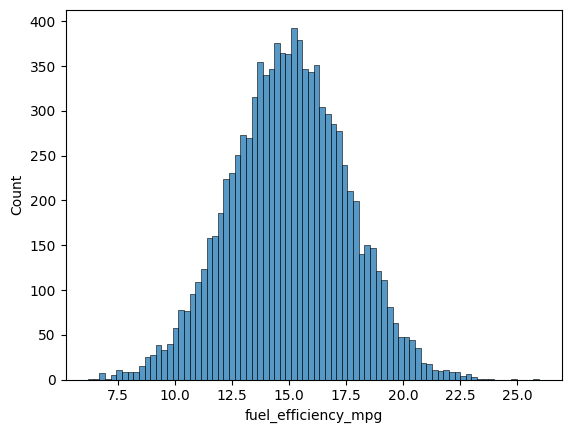

In [7]:
sns.histplot(df.fuel_efficiency_mpg, bins=80)

In [8]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [9]:
df.horsepower.median()

np.float64(149.0)

In [10]:
# Shuffle the dataset (the filtered one you created above), use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.

n = len(df)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val =df.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [13]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTXI = np.linalg.inv(XTX)
    w = XTXI.dot(X.T).dot(y)
    return w[0], w[1:]

def rmse(y, y_pred):
    squared_error = (y - y_pred)**2
    mse = np.mean(squared_error)
    return np.sqrt(mse)

In [14]:
X_train = df_train.fillna(0).values

# Train
w0, w = train_linear_regression(X_train, y_train)

# Validate
X_val = df_val.fillna(0).values
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

np.float64(0.52)

In [15]:
mean_hp = df_train.horsepower.mean()

X_train = df_train.fillna(mean_hp).values

# Train
w0, w = train_linear_regression(X_train, y_train)

# Validate
X_val = df_val.fillna(mean_hp).values
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

np.float64(0.46)

In [16]:
np.float64(0.46)

np.float64(0.46)

In [17]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTXI = np.linalg.inv(XTX)
    w = XTXI.dot(X.T).dot(y)
    return w[0], w[1:]

def prepare_X(df):
    df = df.copy()
    X = df.fillna(0).values
    return X

In [22]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print("r:", r,"w0:",  w0, "score:", round(score, 3))

r: 0 w0: 27.513852581224892 score: 0.513
r: 0.01 w0: 23.763992070001315 score: 0.513
r: 0.1 w0: 10.672729454455807 score: 0.516
r: 1 w0: 1.6397277818269727 score: 0.52
r: 5 w0: 0.34436954136060605 score: 0.52
r: 10 w0: 0.17327271342058204 score: 0.521
r: 100 w0: 0.0174326038486049 score: 0.521


In [23]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train + n_test]].reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    scores.append(rmse(y_val, y_pred))

print("Standard Deviation:", np.std(scores))

Standard Deviation: 0.006989446426433706


In [29]:
seed = 9

idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train + n_test]].reset_index(drop=True)
df_test = df.iloc[idx[n_train + n_test:]].reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

np.float64(0.5156261299169602)